In [4]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
#loading the training data
training = pd.read_csv(r"C:\Users\USER\Downloads\ghana-indigenous-intel-challenge20250815-4756-1bz0qx9\train.csv")
training.head()

,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,indicator,indicator_description,time_observed,Target,forecast_length
0,ID_KwcTp_12,11,0.3,0.0,Tumfa,atiwa_west,2025-05-30 11:09:33,NaN,NaN,NaN,MEDIUMRAIN,12
1,ID_K9vWT_12,17,0.3,0.0,Kwabeng,atiwa_west,2025-05-30 11:09:35,NaN,NaN,NaN,HEAVYRAIN,12
2,ID_AIQg3_12,19,0.3,0.0,Akropong,atiwa_west,2025-05-30 11:09:47,NaN,NaN,NaN,MEDIUMRAIN,12
3,ID_px4yf_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:33,NaN,NaN,NaN,HEAVYRAIN,12
4,ID_QYYmK_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:55,NaN,NaN,NaN,HEAVYRAIN,12


### Lets learn more about our training dataset


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10928 entries, 0 to 10927
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10928 non-null  object 
 1   user_id                10928 non-null  int64  
 2   confidence             10928 non-null  float64
 3   predicted_intensity    10928 non-null  float64
 4   community              10928 non-null  object 
 5   district               10928 non-null  object 
 6   prediction_time        10928 non-null  object 
 7   indicator              503 non-null    object 
 8   indicator_description  346 non-null    object 
 9   time_observed          72 non-null     object 
 10  Target                 10928 non-null  object 
 11  forecast_length        10928 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 1.0+ MB


In [7]:
training.columns

Index(['ID', 'user_id', 'confidence', 'predicted_intensity', 'community',
       'district', 'prediction_time', 'indicator', 'indicator_description',
       'time_observed', 'Target', 'forecast_length'],
      dtype='object')

In [8]:
training.isna().sum()# checking for missing values

ID                           0
user_id                      0
confidence                   0
predicted_intensity          0
community                    0
district                     0
prediction_time              0
indicator                10425
indicator_description    10582
time_observed            10856
Target                       0
forecast_length              0
dtype: int64

In [9]:
training.dtypes

ID                        object
user_id                    int64
confidence               float64
predicted_intensity      float64
community                 object
district                  object
prediction_time           object
indicator                 object
indicator_description     object
time_observed             object
Target                    object
forecast_length            int64
dtype: object

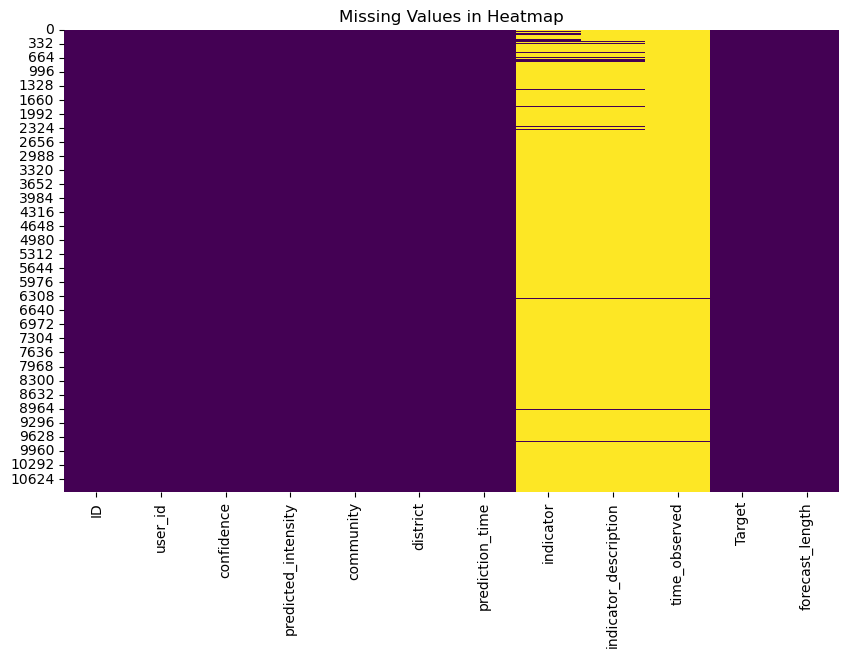

In [10]:
#visualizing the msising values
plt.figure(figsize=(10,6))
sns.heatmap(training.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=90)
plt.title('Missing Values in Heatmap')
plt.show()

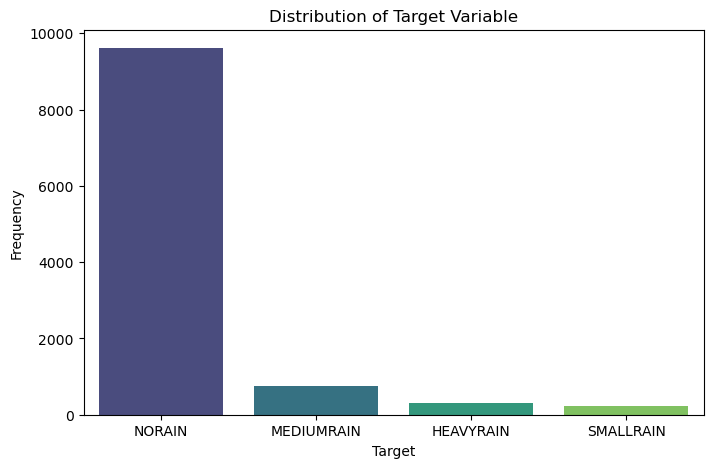

In [11]:
#visualize the distribution of the target variable
plt.figure(figsize=(8,5))
sns.barplot(x=training['Target'].value_counts().index, y=training['Target'].value_counts().values, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

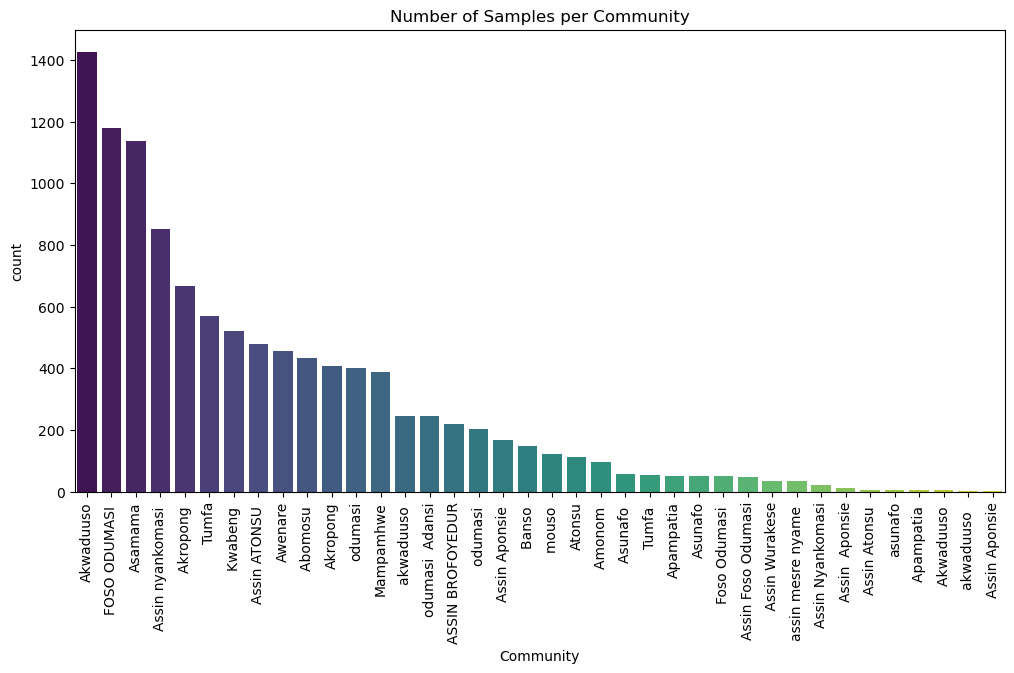

In [12]:
#visualize which community has the highest number of samples
plt.figure(figsize=(12,6))
sns.countplot(data=training, x='community', order=training['community'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Samples per Community')
plt.xlabel('Community')
plt.show()

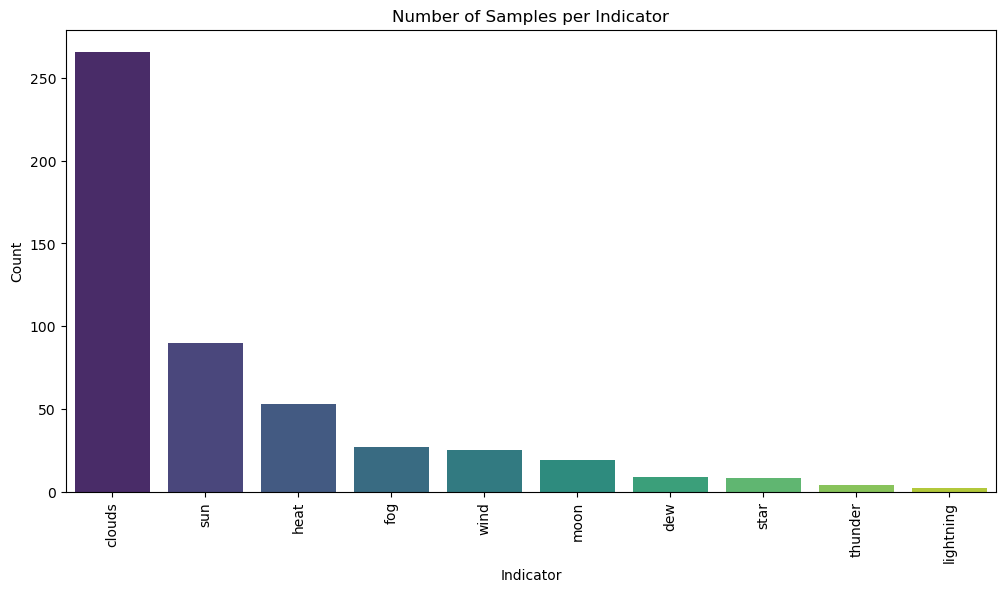

In [13]:
#visualizing indicator 
plt.figure(figsize=(12,6))
indicator_counts = training['indicator'].value_counts()
sns.barplot(x=indicator_counts.index, y=indicator_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Samples per Indicator')
plt.xlabel('Indicator') 
plt.ylabel('Count')
plt.show()

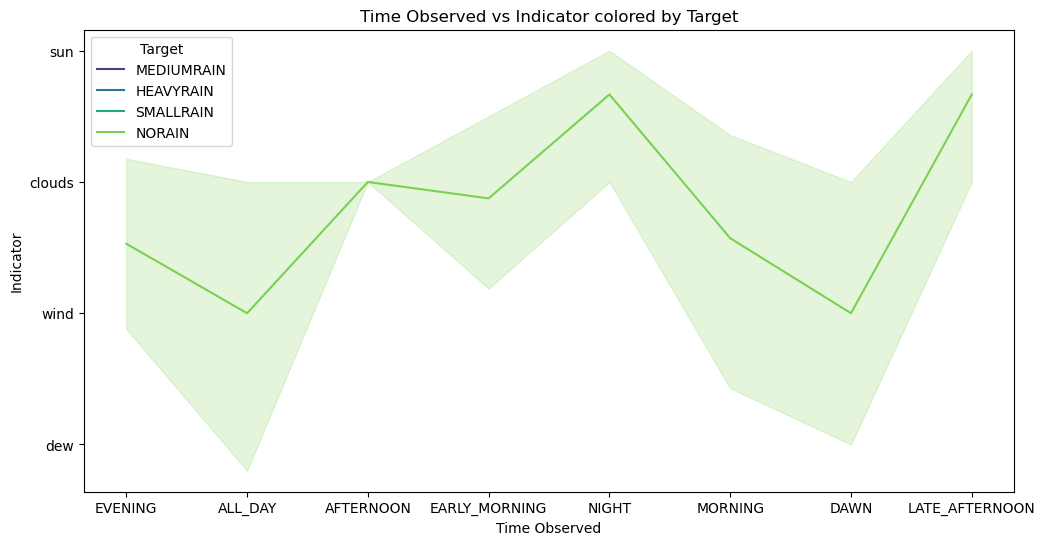

In [14]:
#lets visulize time observed against indicator
plt.figure(figsize=(12,6))
sns.lineplot(data=training, x='time_observed', y='indicator', hue='Target', palette='viridis')
plt.title('Time Observed vs Indicator colored by Target')
plt.xlabel('Time Observed')
plt.ylabel('Indicator')
plt.show()

### Test dataset

In [15]:
#loading the test dataset
test = pd.read_csv(r"C:\Users\USER\Downloads\ghana-indigenous-intel-challenge20250815-4756-1bz0qx9\test.csv")
test.head()

,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,indicator,indicator_description,time_observed,forecast_length
0,ID_SbTdy_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:28,NaN,NaN,NaN,24
1,ID_SBKYz_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:29,NaN,NaN,NaN,24
2,ID_fAimg_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:30,NaN,NaN,NaN,24
3,ID_2wBqC_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:31,NaN,NaN,NaN,24
4,ID_NItox_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:32,NaN,NaN,NaN,24


In [16]:
#lets understand the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2732 non-null   object 
 1   user_id                2732 non-null   int64  
 2   confidence             2732 non-null   float64
 3   predicted_intensity    2732 non-null   float64
 4   community              2732 non-null   object 
 5   district               2732 non-null   object 
 6   prediction_time        2732 non-null   object 
 7   indicator              205 non-null    object 
 8   indicator_description  205 non-null    object 
 9   time_observed          205 non-null    object 
 10  forecast_length        2732 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 234.9+ KB


In [17]:
test.columns

Index(['ID', 'user_id', 'confidence', 'predicted_intensity', 'community',
       'district', 'prediction_time', 'indicator', 'indicator_description',
       'time_observed', 'forecast_length'],
      dtype='object')

In [18]:
test.isna().sum()

ID                          0
user_id                     0
confidence                  0
predicted_intensity         0
community                   0
district                    0
prediction_time             0
indicator                2527
indicator_description    2527
time_observed            2527
forecast_length             0
dtype: int64

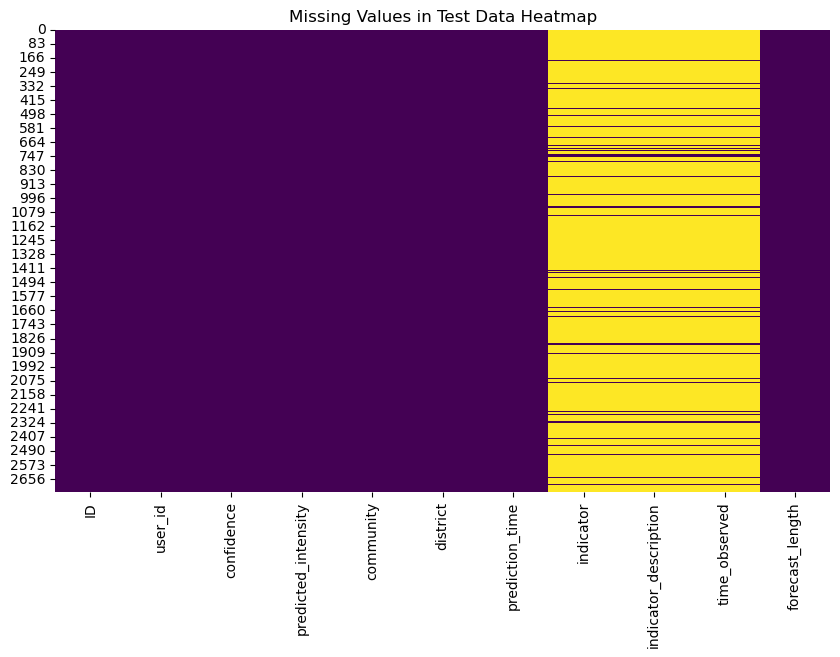

In [19]:
#visualize the missing values in the test dataset
plt.figure(figsize=(10,6))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=90)
plt.title('Missing Values in Test Data Heatmap')
plt.show()

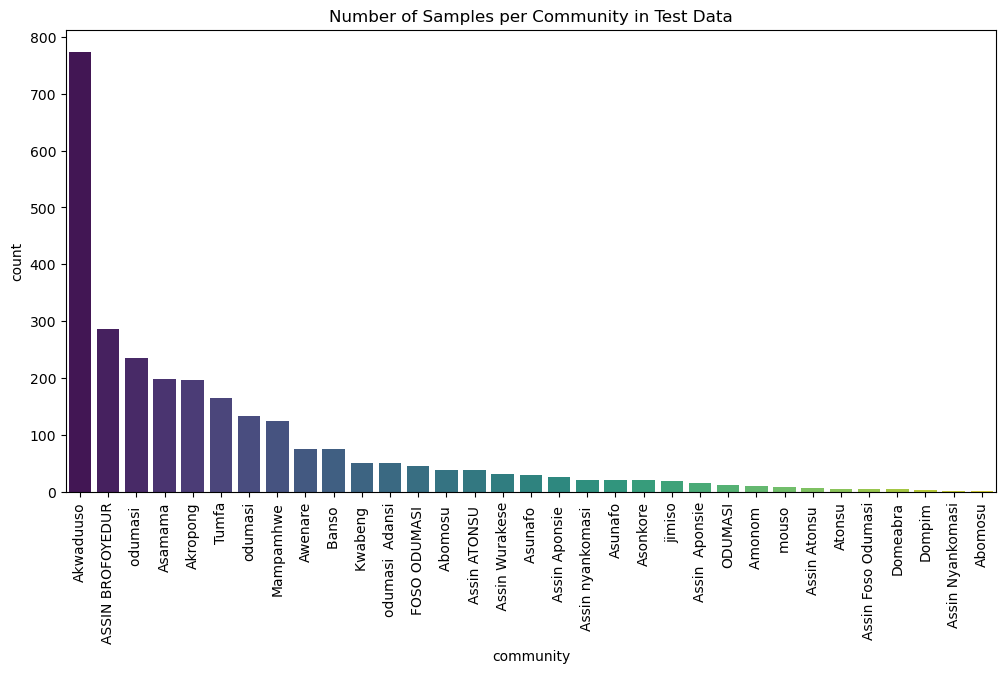

In [20]:
#visualize which community has the highest number of samples
plt.figure(figsize=(12,6))
sns.countplot(data=test, x='community', order=test['community'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Samples per Community in Test Data')
plt.show()

In [21]:
#viewing the statistical summary of the dataset
test.describe()

,user_id,confidence,predicted_intensity,forecast_length
count,2732.000000,2732.000000,2732.000000,2732.000000
mean,43.156662,0.460761,0.027786,18.127379
std,26.611867,0.236471,0.102371,5.999746
min,7.000000,0.300000,0.000000,12.000000
25%,18.000000,0.300000,0.000000,12.000000
50%,26.000000,0.300000,0.000000,24.000000
75%,64.500000,0.600000,0.000000,24.000000
max,95.000000,1.000000,1.000000,24.000000


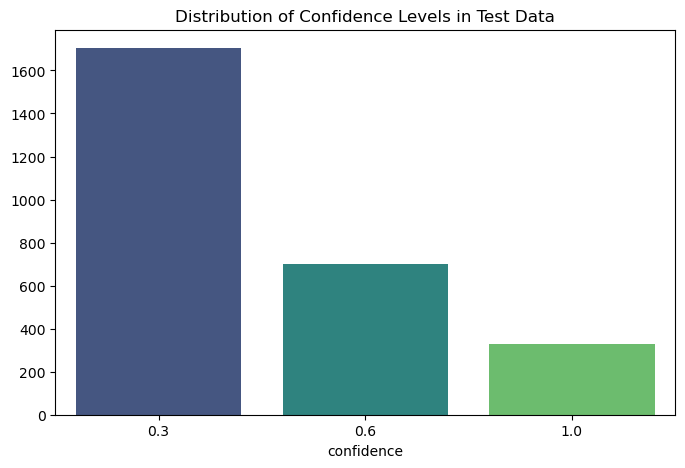

In [22]:
#visualize confidence level in test dataset
plt.figure(figsize=(8,5))
sns.barplot(x=test['confidence'].value_counts().index, y=test['confidence'].value_counts().values, palette='viridis')
plt.title('Distribution of Confidence Levels in Test Data')
plt.show()

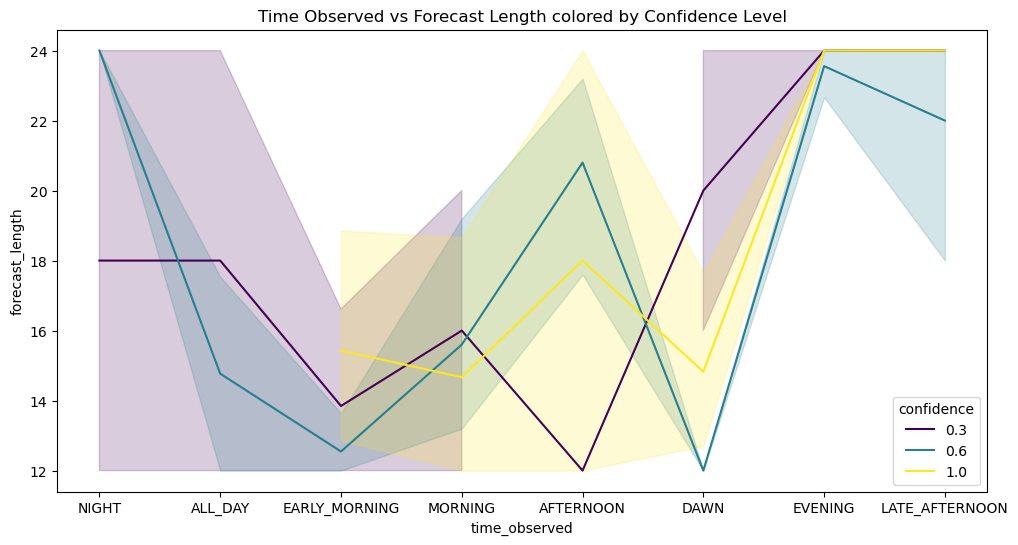

In [23]:
#visualize time observation against forecast_length
plt.figure(figsize=(12,6))
sns.lineplot(data=test, x='time_observed', y='forecast_length', hue='confidence', palette='viridis')
plt.title('Time Observed vs Forecast Length colored by Confidence Level')
plt.show()

Text(0.5, 0, 'Time Observed')

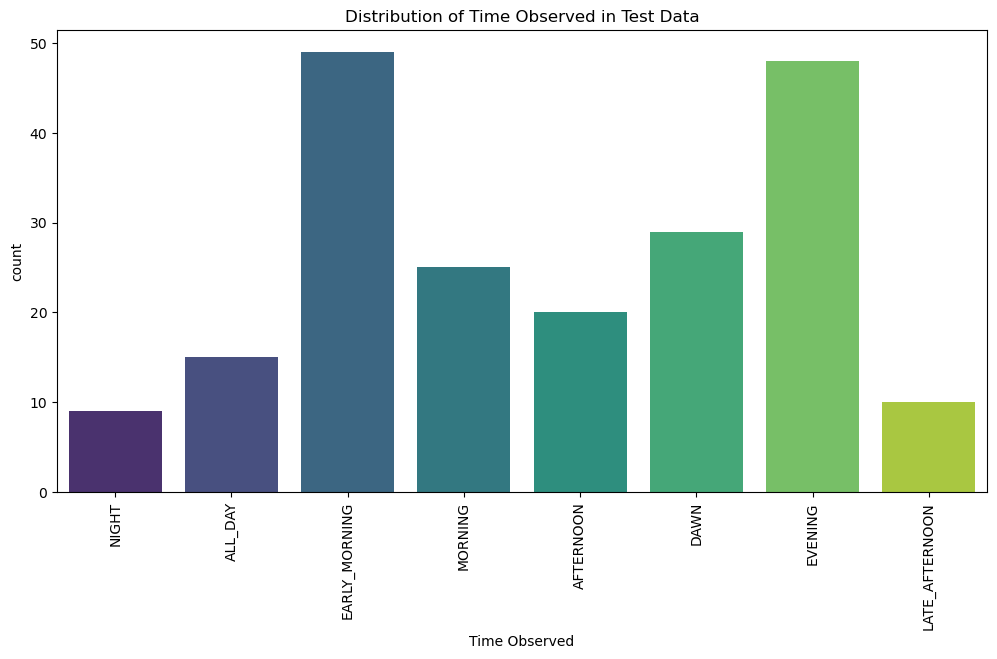

In [24]:
#visualize the time observed
plt.figure(figsize=(12,6))
sns.countplot(x=test['time_observed'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Time Observed in Test Data')
plt.xlabel('Time Observed')

### preprocessing/modelling

In [25]:
import importlib
import transform
importlib.reload(transform)
from transform import ZindiCleaner
cleaner = ZindiCleaner()
X_clean = cleaner.transform(training)


In [28]:
# First, extract date features so 'year', 'month', 'day' exist
test = cleaner._extract_date_features(test)

# Now drop unnecessary columns
X_test = test.drop(columns=['ID', 'indicator_description', 'time_observed'], errors='ignore')

# Transform using the pipeline (ensure columns match training)
X_test_clean = cleaner.pipeline.transform(X_test)


[[  57    0    3    0]
 [   1  140    8    0]
 [   0    3 1912    4]
 [   1    2    6   49]]
              precision    recall  f1-score   support

   HEAVYRAIN       0.97      0.95      0.96        60
  MEDIUMRAIN       0.97      0.94      0.95       149
      NORAIN       0.99      1.00      0.99      1919
   SMALLRAIN       0.92      0.84      0.88        58

    accuracy                           0.99      2186
   macro avg       0.96      0.93      0.95      2186
weighted avg       0.99      0.99      0.99      2186



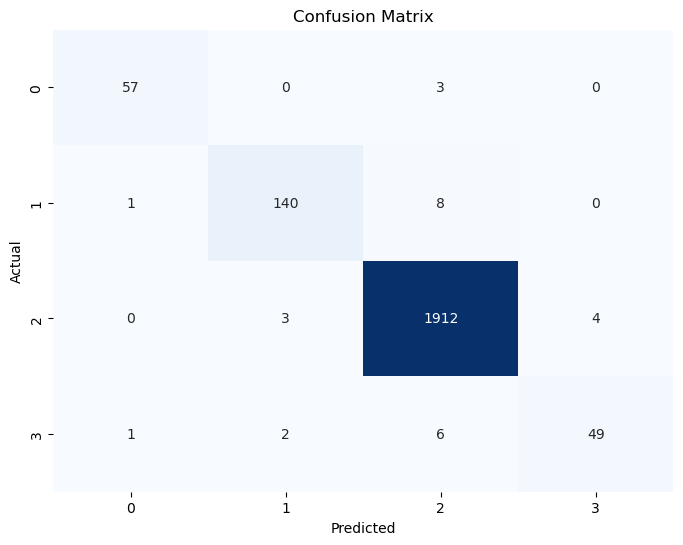

In [34]:
#lets now do modelling'
X_train, X_val, y_train, y_val = train_test_split(X_clean, training['Target'], test_size=0.2, random_state=42)
# --- IGNORE ---
#lets use RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_val)
#classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Seems to be overfitting in my model hence doing hyperparemeter tuning 

In [30]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5,10, 20],
    'min_samples_split': [2, 5, 10],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


[[  57    0    3    0]
 [   1  140    8    0]
 [   0    2 1913    4]
 [   1    2    6   49]]
              precision    recall  f1-score   support

   HEAVYRAIN       0.97      0.95      0.96        60
  MEDIUMRAIN       0.97      0.94      0.96       149
      NORAIN       0.99      1.00      0.99      1919
   SMALLRAIN       0.92      0.84      0.88        58

    accuracy                           0.99      2186
   macro avg       0.96      0.93      0.95      2186
weighted avg       0.99      0.99      0.99      2186



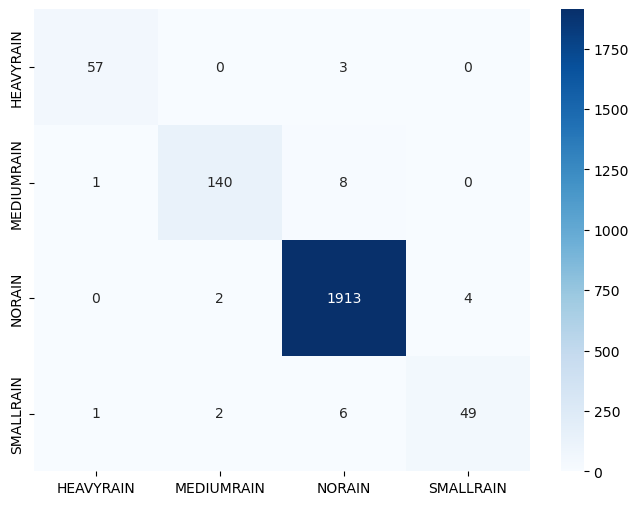

In [33]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(
    max_depth=20,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

best_model.fit(X_train, y_train)
# Predict on the validation set for evaluation
y_pred = best_model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
#plot confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.show()

# To predict on the test set for submission, use:
# test_predictions = best_model.predict(X_test_clean)

[[  57    1    2    0]
 [   1  144    4    0]
 [   0   18 1894    7]
 [   1    2    6   49]]
              precision    recall  f1-score   support

   HEAVYRAIN       0.97      0.95      0.96        60
  MEDIUMRAIN       0.87      0.97      0.92       149
      NORAIN       0.99      0.99      0.99      1919
   SMALLRAIN       0.88      0.84      0.86        58

    accuracy                           0.98      2186
   macro avg       0.93      0.94      0.93      2186
weighted avg       0.98      0.98      0.98      2186



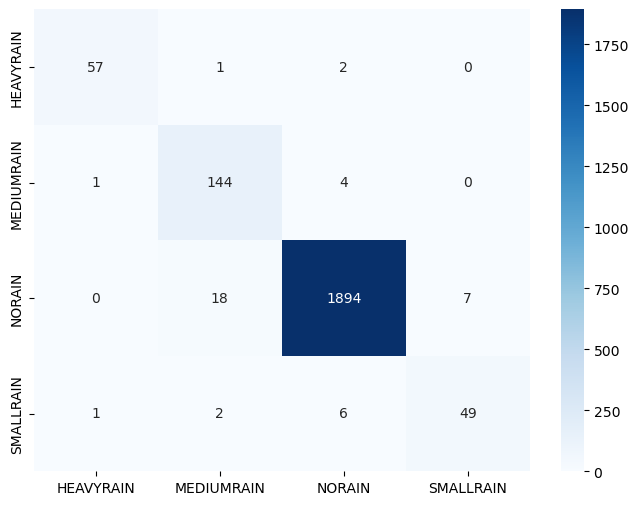

In [35]:
#apply smote to handle class imbalance
from imblearn.over_sampling import SMOTE
best_model = RandomForestClassifier(
    max_depth=20,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)
smote= SMOTE(random_state=42)
X_res, y_res= smote.fit_resample(X_train, y_train)
#fit the model
best_model.fit(X_res, y_res)
#evaluate the model
y_pred = best_model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
#plot confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode labels
le = LabelEncoder()
y_res_encoded = le.fit_transform(y_res)
y_val_encoded = le.transform(y_val)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_res, y_res_encoded)

# Evaluate the model
y_pred = xgb_model.predict(X_val)
print(confusion_matrix(y_val_encoded, y_pred))
print(classification_report(y_val_encoded, y_pred))


[[  58    0    2    0]
 [   1  144    4    0]
 [   0   17 1893    9]
 [   0    2    6   50]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.88      0.97      0.92       149
           2       0.99      0.99      0.99      1919
           3       0.85      0.86      0.85        58

    accuracy                           0.98      2186
   macro avg       0.93      0.95      0.94      2186
weighted avg       0.98      0.98      0.98      2186



In [49]:
#cross validation 
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(RandomForestClassifier(), X_val, y_val, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.99086758 0.97940503 0.97940503 0.97025172 0.97025172]


In [51]:
importances = model.feature_importances_
feature_names = cleaner.pipeline.get_feature_names_out()

importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_df.head(10))

                              Feature  Importance
5                            num__day    0.359647
16             cat__community_Asamama    0.230709
2                num__forecast_length    0.075192
0                     num__confidence    0.058405
45           cat__district_atiwa_west    0.037560
4                          num__month    0.034023
38  cat__community_assin mesre nyame     0.022753
31       cat__community_Foso Odumasi     0.020936
44           cat__district_assin_fosu    0.019746
1            num__predicted_intensity    0.016921


In [52]:
import pandas as pd

# Combine predictions with actuals
results_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred
})

# Save to CSV
results_df.to_csv('model_results.csv', index=False)